# Tarefa 2 - Multilayer Perceptron Classifier para o Hippocampus

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import os
import random

In [2]:
def set_seed(seed: int):
    random.seed(seed) # Python
    np.random.seed(seed)  # Numpy, é o gerador utilizado pelo sklearn
    os.environ["PYTHONHASHSEED"] = str(seed)  # sistema operativo

# Fixar a seed
set_seed(2023)

In [3]:
data_treino = pd.read_csv('./data_mod_hippo/dataset_treino.csv', na_filter=False)
data_teste = pd.read_csv('./data_mod_hippo/dataset_teste.csv', na_filter=False)

In [4]:
data_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Columns: 1906 entries, diagnostics_Image-original_Mean to com_z
dtypes: float64(1899), int64(6), object(1)
memory usage: 4.4+ MB


In [5]:
data_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 1905 entries, diagnostics_Image-original_Mean to com_z
dtypes: float64(1896), int64(9)
memory usage: 1.5 MB


## Conversão de dados do tipo 64 para 32

In [6]:
float_features = data_treino.select_dtypes(include='float')
int_features = data_treino.select_dtypes(include='int')

data_treino[float_features.columns] = data_treino[float_features.columns].astype(np.float32)
data_treino[int_features.columns] = data_treino[int_features.columns].astype(np.int32)
data_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Columns: 1906 entries, diagnostics_Image-original_Mean to com_z
dtypes: float32(1899), int32(6), object(1)
memory usage: 2.2+ MB


In [7]:
float_features = data_teste.select_dtypes(include='float')
int_features = data_teste.select_dtypes(include='int')

data_teste[float_features.columns] = data_teste[float_features.columns].astype(np.float32)
data_teste[int_features.columns] = data_teste[int_features.columns].astype(np.int32)
data_teste.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 1905 entries, diagnostics_Image-original_Mean to com_z
dtypes: float32(1896), int32(9)
memory usage: 744.3 KB


## Normalização de Dados

In [8]:
from sklearn.preprocessing import MinMaxScaler
data_treino_normalize = data_treino.copy()
data_teste_normalize = data_teste.copy()

X_scale = data_treino_normalize.drop(columns=['Transition'])

scaler_X = MinMaxScaler(feature_range=(0,1)).fit(X_scale)
scaler_y = MinMaxScaler(feature_range=(0,1)).fit(data_teste_normalize)
X_scale = pd.DataFrame(scaler_X.transform(X_scale[X_scale.columns]), columns=X_scale.columns)
data_teste_normalize = pd.DataFrame(scaler_y.transform(data_teste_normalize[data_teste_normalize.columns]), columns=data_teste_normalize.columns)

data_treino_normalize = pd.concat([X_scale, data_treino_normalize['Transition']], axis=1)

data_treino_normalize.head()

,diagnostics_Image-original_Mean,diagnostics_Image-original_Maximum,diagnostics_Mask-original_VoxelNum,original_shape_Elongation,original_shape_Flatness,original_shape_LeastAxisLength,original_shape_MajorAxisLength,original_shape_Maximum2DDiameterColumn,original_shape_Maximum2DDiameterRow,original_shape_Maximum2DDiameterSlice,...,bbox_x1,bbox_y1,bbox_x2,bbox_y2,bbox_x3,bbox_y3,com_x,com_y,com_z,Transition
0,0.468027,0.448430,0.587848,0.550147,0.690337,0.602391,0.339970,0.356589,0.295548,0.562431,...,0.769231,0.317308,0.571429,0.1250,0.693878,0.272727,0.723281,0.361338,0.557828,CN-CN
1,0.281221,0.556054,0.706032,0.585322,0.602089,0.518581,0.365822,0.412638,0.389133,0.619620,...,0.205128,0.586538,0.571429,0.8125,0.122449,0.363636,0.276666,0.490769,0.546699,CN-CN
2,0.764980,0.242152,0.517780,0.728840,1.000000,1.000000,0.506137,0.714104,0.676976,0.932585,...,0.102564,0.432692,0.285714,0.9375,0.693878,0.727273,0.165689,0.490785,0.607888,AD-AD
3,0.651078,0.385650,0.794187,0.542751,0.538208,0.572060,0.532693,0.637319,0.577739,0.760667,...,0.512821,0.105769,0.357143,0.4375,0.653061,0.590909,0.553885,0.133022,0.635708,CN-MCI
4,0.382225,0.197309,0.391167,0.497211,0.122606,0.119737,0.640989,0.513771,0.492226,0.566272,...,0.358974,0.432692,0.428571,0.3750,0.571429,0.454545,0.312799,0.421267,0.494897,CN-CN


## Conversão de dados do tipo 64 para 32 depois da normalização

In [9]:
float_features = data_treino_normalize.select_dtypes(include='float')
int_features = data_treino_normalize.select_dtypes(include='int')

data_treino_normalize[float_features.columns] = data_treino_normalize[float_features.columns].astype(np.float32)
data_treino_normalize[int_features.columns] = data_treino_normalize[int_features.columns].astype(np.int32)
data_treino_normalize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Columns: 1906 entries, diagnostics_Image-original_Mean to Transition
dtypes: float32(1905), object(1)
memory usage: 2.2+ MB


In [10]:
float_features = data_teste_normalize.select_dtypes(include='float')
int_features = data_teste_normalize.select_dtypes(include='int')

data_teste_normalize[float_features.columns] = data_teste_normalize[float_features.columns].astype(np.float32)
data_teste_normalize[int_features.columns] = data_teste_normalize[int_features.columns].astype(np.int32)
data_teste_normalize.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Columns: 1905 entries, diagnostics_Image-original_Mean to com_z
dtypes: float32(1905)
memory usage: 744.3 KB


## Split Data

In [11]:
from sklearn.model_selection import train_test_split

X_treino = data_treino.drop(columns=['Transition'])
y_treino = data_treino['Transition']

X_teste = data_teste

X_train, X_test, y_train, y_test = train_test_split(X_treino, y_treino, test_size=0.2, random_state=2023)

X_treino_normalize = data_treino_normalize.drop(columns=['Transition'])
y_treino_normalize = data_treino_normalize['Transition']

X_teste_normalize = data_teste_normalize

X_train_normalize, X_test_normalize, y_train_normalize, y_test_normalize = train_test_split(X_treino_normalize, y_treino_normalize, test_size=0.2, random_state=2023)

## Feature Selection

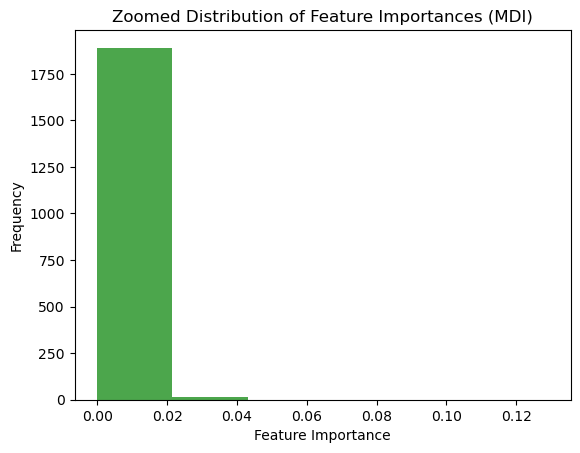

Features com importância MDI - 0: 1846


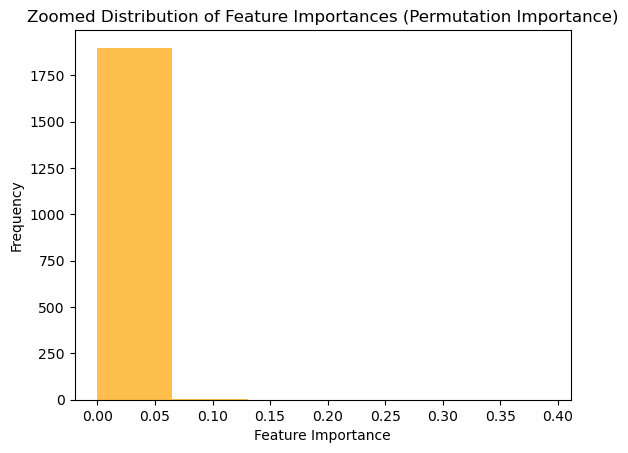

Features com importância Permutation - 0: 1846


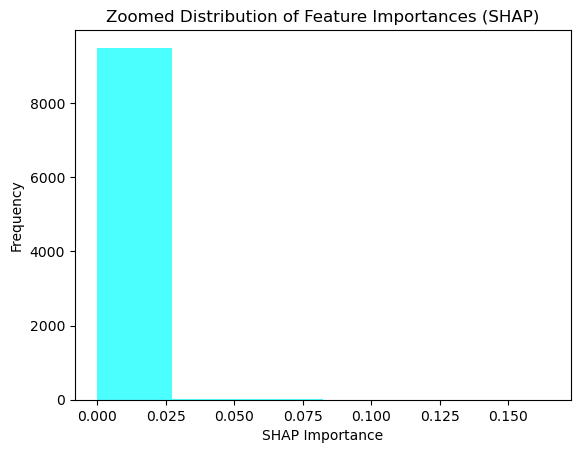

Features com importância SHAP - 0: 1859
Features a serem removidas (comuns a todas as abordagens): 1802


In [12]:
import shap
from sklearn.tree import DecisionTreeClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

model = DecisionTreeClassifier(random_state=2023)
model.fit(X_treino, y_treino)

### 1. Feature Importance baseado em Mean Decrease in Impurity (MDI)
mdi_importances = model.feature_importances_

plt.hist(mdi_importances, bins=6, range=(0, max(mdi_importances)), color='green', alpha=0.7)
plt.xlabel("Feature Importance")
plt.ylabel("Frequency")
plt.title("Zoomed Distribution of Feature Importances (MDI)")
plt.show()

# Identificar features com importância MDI menor ou igual ao limite
mdi_threshold = 0
features_mdi = [feature for feature, importance in zip(X_treino.columns, mdi_importances) if importance == mdi_threshold]
print(f"Features com importância MDI - {mdi_threshold}: {len(features_mdi)}")

### 2. Feature Importance baseado em Permutation Importance
perm_importance = permutation_importance(model, X_treino, y_treino, n_repeats=5, random_state=2023, n_jobs = -1)
perm_importances = perm_importance.importances_mean

plt.hist(perm_importances, bins=6, range=(0, max(perm_importances)), color='orange', alpha=0.7)
plt.xlabel("Feature Importance")
plt.ylabel("Frequency")
plt.title("Zoomed Distribution of Feature Importances (Permutation Importance)")
plt.show()

# Identificar features com importância de Permutation menor ou igual ao limite
perm_threshold = 0
features_perm = [feature for feature, importance in zip(X_treino.columns, perm_importances) if importance == perm_threshold]
print(f"Features com importância Permutation - {perm_threshold}: {len(features_perm)}")

### 3. Feature Importance baseado em SHAP
# Criar valores SHAP para o modelo
explainer = shap.TreeExplainer(model, X_treino)
shap_values = explainer(X_treino, check_additivity=False)

# Calcular a média dos valores absolutos de SHAP para cada feature
shap_importances = np.abs(shap_values.values).mean(axis=0)

# Garantir que shap_importances seja uma lista ou array unidimensional
shap_importances = np.array(shap_importances).flatten()

plt.hist(shap_importances, bins=6, range=(0, max(shap_importances)), color='cyan', alpha=0.7)
plt.xlabel("SHAP Importance")
plt.ylabel("Frequency")
plt.title("Zoomed Distribution of Feature Importances (SHAP)")
plt.show()

# Identificar features com importância SHAP menor ou igual ao limite
shap_threshold = 0
features_shap = [feature for feature, importance in zip(X_treino.columns, shap_importances) if importance == shap_threshold]
print(f"Features com importância SHAP - {shap_threshold}: {len(features_shap)}")

### 4. Combinação de todas as abordagenspermutat
features_to_drop = list(
    set(features_mdi).intersection(set(features_perm)).intersection(set(features_shap))
)
print(f"Features a serem removidas (comuns a todas as abordagens): {len(features_to_drop)}")

In [13]:
### Remover as features identificadas
X_train = X_train.drop(columns=features_to_drop)
X_test = X_test.drop(columns=features_to_drop)
X_treino = X_treino.drop(columns=features_to_drop)
X_teste = X_teste.drop(columns=features_to_drop)

X_train_normalize = X_train_normalize.drop(columns=features_to_drop)
X_test_normalize = X_test_normalize.drop(columns=features_to_drop)
X_treino_normalize = X_treino_normalize.drop(columns=features_to_drop)
X_teste_normalize = X_teste_normalize.drop(columns=features_to_drop)

print(f"Conjunto de treino reduzido: {X_treino.shape}")
print(f"Conjunto de teste reduzido: {X_teste.shape}")
print(f"Conjunto de treino reduzido: {X_treino_normalize.shape}")
print(f"Conjunto de teste reduzido: {X_teste_normalize.shape}")

Conjunto de treino reduzido: (305, 103)
Conjunto de teste reduzido: (100, 103)
Conjunto de treino reduzido: (305, 103)
Conjunto de teste reduzido: (100, 103)


## Grid Search

Fitting 3 folds for each of 810 candidates, totalling 2430 fits
[CV 1/3] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(50, 50, 25), learning_rate=constant, max_iter=1000, solver=adam;, score=0.305 total time=   0.1s
[CV 2/3] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(50, 50, 25), learning_rate=constant, max_iter=1000, solver=adam;, score=0.333 total time=   0.1s
[CV 3/3] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(50, 50, 25), learning_rate=constant, max_iter=1000, solver=adam;, score=0.321 total time=   0.1s
[CV 1/3] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(50, 50, 25), learning_rate=constant, max_iter=1000, solver=sgd;, score=0.195 total time=   0.0s
[CV 2/3] END activation=relu, alpha=0.0001, early_stopping=True, hidden_layer_sizes=(50, 50, 25), learning_rate=constant, max_iter=1000, solver=sgd;, score=0.198 total time=   0.0s
[CV 3/3] END activation=relu

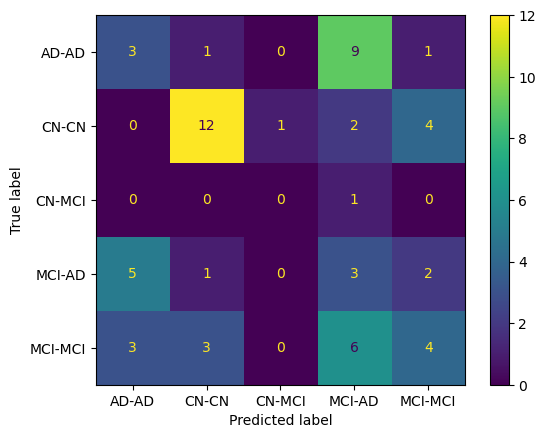

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV

mlp = MLPClassifier(random_state=2023)

param_grid = {
    'hidden_layer_sizes': [
        (50, 50, 25), 
        (100,),  
        (100, 50),  
        (100, 50, 25),  
        (50, 50) 
    ],
    'activation': ['relu', 'tanh', 'logistic'],  
    'solver': ['adam', 'sgd', 'lbfgs'],  
    'alpha': [0.0001, 0.001, 0.01],  
    'max_iter': [1000, 5000,10000],
    'learning_rate': ['constant', 'adaptive'],
    'early_stopping': [True],  
}   

grid_searchMLP = GridSearchCV(mlp, param_grid, cv=3, refit=True, verbose=3)
grid_searchMLP.fit(X_train_normalize, y_train_normalize)
grid_predictionMLP = grid_searchMLP.predict(X_test_normalize)

print("Best estimator: ", grid_searchMLP.best_estimator_)
mlp_best = grid_searchMLP.best_estimator_

print(classification_report(y_test_normalize, grid_predictionMLP))
ConfusionMatrixDisplay.from_predictions(y_test_normalize, grid_predictionMLP)
plt.show()

## Multilayer Perceptron Classifier

In [19]:
from sklearn.neural_network import MLPClassifier

MLP_best.fit(X_treino_normalize, y_treino_normalize)
predictionMLP = MLP_best.predict(X_teste_normalize)

In [20]:
with open('results_MLP.csv', 'w') as results:
    results.write('RowId,Result\n')
    i = 1
    for p in predictionMLP:
        results.write(f'{i},{p}\n')
        i+=1